# Data Preprocessing

In [49]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
# Navigate to the desired URL
url = 'https://finviz.com/quote.ashx?t=AAPL&p=d'
driver.get(url)

# element = driver.find_element(By.XPATH, '/html/body/div[3]/div[3]/div[4]/table/tbody/tr/td/div/table[2]/tbody/tr[7]/td/table/tbody/tr/td[1]/div/table/tbody')

element = driver.find_element(By.CSS_SELECTOR,'#news-table')
content=element.text
# Print the extracted content
print(content)
driver.quit()

Today 08:00PM
TikTok Divestment Push Advances With House Committee Approval
(Bloomberg)
06:24PM
Broadcom Expects AI Demand to Help Offset Weakness Elsewhere
(Bloomberg)
05:24PM
Mag. 7 experiencing 'outsized punishment' relative to success
(Yahoo Finance Video)
05:13PM
15 Best Apple Watch Alternatives in 2024
(Insider Monkey)
04:11PM
Nvidia's $1 Trillion Market Cap Gain This Year Is Nearly Double Tesla's Entire Market Cap
(Investopedia)
03:32PM
Apple, Meta, Google, and Others Must Now Comply With New Law as EU Takes Aim at Big Tech
(Investopedia)
03:05PM
Magnificent Seven Stocks To Buy And Watch: Meta, Nvidia Surge To Record Highs
(Investor's Business Daily)
02:37PM
EU looking into Apple's decision to kill Epic Games' developer account
(TechCrunch)
02:26PM
Europe's DMA rules for Big Tech explained
(TechCrunch)
02:15PM
Apple M3 MacBook Air review: Still the best Mac for most
(TechCrunch)
01:38PM
How Apple Stands to Lose From Europes New Tech Law
(The Wall Street Journal)
12:37PM
EU regul

In [52]:
content_list = content.split('\n')

In [65]:
content_title_list = content_list[1::3]

# Tokenization

In [68]:
import nltk
from nltk.tokenize import word_tokenize

tokenized_titles = [word_tokenize(title) for title in content_title_list]

In [69]:
tokenized_titles

[['TikTok',
  'Divestment',
  'Push',
  'Advances',
  'With',
  'House',
  'Committee',
  'Approval'],
 ['Broadcom',
  'Expects',
  'AI',
  'Demand',
  'to',
  'Help',
  'Offset',
  'Weakness',
  'Elsewhere'],
 ['Mag',
  '.',
  '7',
  'experiencing',
  "'outsized",
  'punishment',
  "'",
  'relative',
  'to',
  'success'],
 ['15', 'Best', 'Apple', 'Watch', 'Alternatives', 'in', '2024'],
 ['Nvidia',
  "'s",
  '$',
  '1',
  'Trillion',
  'Market',
  'Cap',
  'Gain',
  'This',
  'Year',
  'Is',
  'Nearly',
  'Double',
  'Tesla',
  "'s",
  'Entire',
  'Market',
  'Cap'],
 ['Apple',
  ',',
  'Meta',
  ',',
  'Google',
  ',',
  'and',
  'Others',
  'Must',
  'Now',
  'Comply',
  'With',
  'New',
  'Law',
  'as',
  'EU',
  'Takes',
  'Aim',
  'at',
  'Big',
  'Tech'],
 ['Magnificent',
  'Seven',
  'Stocks',
  'To',
  'Buy',
  'And',
  'Watch',
  ':',
  'Meta',
  ',',
  'Nvidia',
  'Surge',
  'To',
  'Record',
  'Highs'],
 ['EU',
  'looking',
  'into',
  'Apple',
  "'s",
  'decision',
  'to',


# Remove stopword


In [77]:
from nltk.corpus import stopwords

nltk.download('stopwords') 

stop_words = set(stopwords.words('english'))  # Set the language for stop words

filtered_titles = []
for title in tokenized_titles:
    filtered_title = [word for word in title if word.lower() not in stop_words]
    filtered_titles.append(filtered_title)

print(filtered_titles)

[['TikTok', 'Divestment', 'Push', 'Advances', 'House', 'Committee', 'Approval'], ['Broadcom', 'Expects', 'AI', 'Demand', 'Help', 'Offset', 'Weakness', 'Elsewhere'], ['Mag', '.', '7', 'experiencing', "'outsized", 'punishment', "'", 'relative', 'success'], ['15', 'Best', 'Apple', 'Watch', 'Alternatives', '2024'], ['Nvidia', "'s", '$', '1', 'Trillion', 'Market', 'Cap', 'Gain', 'Year', 'Nearly', 'Double', 'Tesla', "'s", 'Entire', 'Market', 'Cap'], ['Apple', ',', 'Meta', ',', 'Google', ',', 'Others', 'Must', 'Comply', 'New', 'Law', 'EU', 'Takes', 'Aim', 'Big', 'Tech'], ['Magnificent', 'Seven', 'Stocks', 'Buy', 'Watch', ':', 'Meta', ',', 'Nvidia', 'Surge', 'Record', 'Highs'], ['EU', 'looking', 'Apple', "'s", 'decision', 'kill', 'Epic', 'Games', "'", 'developer', 'account'], ['Europe', "'s", 'DMA', 'rules', 'Big', 'Tech', 'explained'], ['Apple', 'M3', 'MacBook', 'Air', 'review', ':', 'Still', 'best', 'Mac'], ['Apple', 'Stands', 'Lose', 'Europes', 'New', 'Tech', 'Law'], ['EU', 'regulators', 't

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natalieyuen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Remove punctuations

In [82]:
import string

# Create a translation table to remove punctuation
translator = str.maketrans('', '', string.punctuation)

# Remove punctuation from each sentence
filtered_titles = [[word.translate(translator) for word in title] for title in filtered_titles]

# Remove empty strings
filtered_titles = [[word for word in title if word] for title in filtered_titles]

print(filtered_titles)

[['TikTok', 'Divestment', 'Push', 'Advances', 'House', 'Committee', 'Approval'], ['Broadcom', 'Expects', 'AI', 'Demand', 'Help', 'Offset', 'Weakness', 'Elsewhere'], ['Mag', '7', 'experiencing', 'outsized', 'punishment', 'relative', 'success'], ['15', 'Best', 'Apple', 'Watch', 'Alternatives', '2024'], ['Nvidia', 's', '1', 'Trillion', 'Market', 'Cap', 'Gain', 'Year', 'Nearly', 'Double', 'Tesla', 's', 'Entire', 'Market', 'Cap'], ['Apple', 'Meta', 'Google', 'Others', 'Must', 'Comply', 'New', 'Law', 'EU', 'Takes', 'Aim', 'Big', 'Tech'], ['Magnificent', 'Seven', 'Stocks', 'Buy', 'Watch', 'Meta', 'Nvidia', 'Surge', 'Record', 'Highs'], ['EU', 'looking', 'Apple', 's', 'decision', 'kill', 'Epic', 'Games', 'developer', 'account'], ['Europe', 's', 'DMA', 'rules', 'Big', 'Tech', 'explained'], ['Apple', 'M3', 'MacBook', 'Air', 'review', 'Still', 'best', 'Mac'], ['Apple', 'Stands', 'Lose', 'Europes', 'New', 'Tech', 'Law'], ['EU', 'regulators', 'take', 'interest', 'AppleEpic', 'Games', 'dispute'], ['H

# Remove numbers

In [86]:
import re

filtered_titles = [[word for word in title if not re.match(r'\d+', word)] for title in filtered_titles]

print(filtered_titles)

[['TikTok', 'Divestment', 'Push', 'Advances', 'House', 'Committee', 'Approval'], ['Broadcom', 'Expects', 'AI', 'Demand', 'Help', 'Offset', 'Weakness', 'Elsewhere'], ['Mag', 'experiencing', 'outsized', 'punishment', 'relative', 'success'], ['Best', 'Apple', 'Watch', 'Alternatives'], ['Nvidia', 's', 'Trillion', 'Market', 'Cap', 'Gain', 'Year', 'Nearly', 'Double', 'Tesla', 's', 'Entire', 'Market', 'Cap'], ['Apple', 'Meta', 'Google', 'Others', 'Must', 'Comply', 'New', 'Law', 'EU', 'Takes', 'Aim', 'Big', 'Tech'], ['Magnificent', 'Seven', 'Stocks', 'Buy', 'Watch', 'Meta', 'Nvidia', 'Surge', 'Record', 'Highs'], ['EU', 'looking', 'Apple', 's', 'decision', 'kill', 'Epic', 'Games', 'developer', 'account'], ['Europe', 's', 'DMA', 'rules', 'Big', 'Tech', 'explained'], ['Apple', 'M3', 'MacBook', 'Air', 'review', 'Still', 'best', 'Mac'], ['Apple', 'Stands', 'Lose', 'Europes', 'New', 'Tech', 'Law'], ['EU', 'regulators', 'take', 'interest', 'AppleEpic', 'Games', 'dispute'], ['Heard', 'Street', 'Apple'

In [104]:
join_filtered_titles=[]

for title in filtered_titles:
    join_filtered_title = " ".join(title)
    join_filtered_titles.append(join_filtered_title)


In [ ]:
# Identify number of clusters

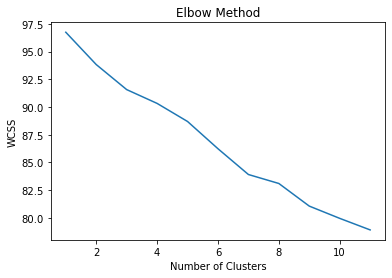

In [120]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'X' is your data

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(join_filtered_titles)

wcss = []  # Within-Cluster Sum of Squares

# Fit K-means clustering for different numbers of clusters
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the number of clusters vs. WCSS
plt.plot(range(1, 12), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

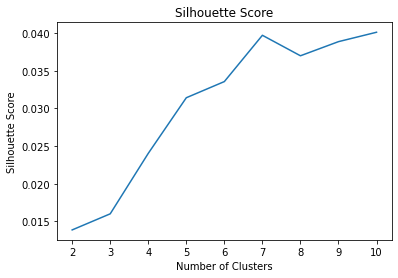

In [126]:
from sklearn.metrics import silhouette_score

silhouette_scores = []  # Silhouette scores

# Fit K-means clustering for different numbers of clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the number of clusters vs. silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

# Clustering

In [127]:
k = 7  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Step 4: Refine the Clustering
# Get the cluster labels and cleaned sentences
sentence_clusters = kmeans.labels_

# Store the sentences in separate lists based on their cluster labels
clusters = [[] for _ in range(k)]
for sentence, cluster in zip(join_filtered_titles, sentence_clusters):
    clusters[cluster].append(sentence)

clusters = sorted(clusters, key=lambda x: len(x), reverse=True)

# Step 5: Print the sentences in each cluster
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}:")
    for sentence in cluster:
        print(sentence)
    print()

Cluster 0:
TikTok Divestment Push Advances House Committee Approval
Broadcom Expects AI Demand Help Offset Weakness Elsewhere
Mag experiencing outsized punishment relative success
Magnificent Seven Stocks Buy Watch Meta Nvidia Surge Record Highs
Target Corporation NYSE TGT Q4 Earnings Call Transcript
Stocks rip higher shifting tech sentiments selloff
Stocks Rise Despite Powells Reluctance Cut Rates Heres Things Know Markets Open
Chart Shows Microsoft Became Biggest Magnificent Seven Stock World s Valuable Company
OpenAIs success put huge target back
Magnificent Seven s AI plays losing investor interest
Super Micro Computer Stock Hits New High Amid Optimism AIRelated Growth
ChatGPT Everything need know AIpowered chatbot
Stocks bounce back tech selloff opening green
Fed Chair Powell get grilled Congress Heres markets want hear
Tech Giants Drag US Stocks Torrid Rally Markets Wrap
US STOCKSTechheavy Nasdaq leads Wall Street lower megacaps chips slide
VUG vs VGT TechHeavy ETF Better Buy
Top